In [1]:
import scipy.io as sio
import cv2
import matplotlib.pyplot as plt
import numpy as np
import Augmentor

In [ ]:
X_3_1=sio.loadmat('X_3_1.mat')
X_3_1_matrix = X_3_1['X_3_1']
plt.imshow(X_3_1_matrix)

In [ ]:
X_3_2=sio.loadmat('X_3_2.mat')
X_3_2_matrix = X_3_2['X_3_2']
plt.imshow(X_3_2_matrix)

In [ ]:
X_2_1=sio.loadmat('X_2_1.mat')
X_2_1_matrix = X_2_1['X_2_1']
plt.imshow(X_2_1_matrix)

In [ ]:
X_2_2=sio.loadmat('X_2_2.mat')
X_2_2_matrix = X_2_2['X_2_2']
plt.imshow(X_2_2_matrix)

In [ ]:
X_120=sio.loadmat('X_120.mat')
X_120_matrix = X_120['X_120']
Y_120=sio.loadmat('Y_120.mat')
Y_120_matrix = Y_120['Y_120']

X_180=sio.loadmat('X_180.mat')
X_180_matrix = X_180['X_180']
Y_180=sio.loadmat('Y_180.mat')
Y_180_matrix = Y_180['Y_180']


In [ ]:
print ('X_120_matrix')
print(X_120_matrix.shape)
print ('Y_120_matrix')
print(Y_120_matrix.shape)
print ('X_180_matrix')
print(X_180_matrix.shape)
print ('Y_180_matrix')
print(Y_180_matrix.shape)

In [ ]:
cv2.startWindowThread()
cv2.namedWindow("preview")
cv2.imshow('preview',X_2_1_matrix)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [ ]:
X_120_matrix.shape

In [ ]:
test=cv2.resize(X_3_1_matrix, (100,100), interpolation = cv2.INTER_CUBIC)

In [ ]:
plt.imshow(test)


In [ ]:
plt.imshow(X_3_1_matrix)

In [ ]:
test.shape

In [ ]:
test = X_120_matrix.reshape()

In [ ]:
def resize_all_images(X,size=100):
    X_shape = X.shape;
    num_images = X_shape[3];
    X_new = np.zeros((size,size,3,num_images));
    print ('num_images')
    print (num_images);
    for i in range (num_images):
        X_new[:,:,:,i] = cv2.resize(X[:,:,:,i], (size,size), interpolation = cv2.INTER_CUBIC)
    return X_new

In [ ]:
X_120_matrix_new = resize_all_images(X_120_matrix,size=100)
X_180_matrix_new = resize_all_images(X_180_matrix,size=100)
X_2_1_matrix_new = cv2.resize(X_2_1_matrix, (100,100), interpolation = cv2.INTER_CUBIC).reshape((100,100,3,1))
X_2_2_matrix_new = cv2.resize(X_2_2_matrix, (100,100), interpolation = cv2.INTER_CUBIC).reshape((100,100,3,1))
X_3_1_matrix_new = cv2.resize(X_3_1_matrix, (100,100), interpolation = cv2.INTER_CUBIC).reshape((100,100,3,1))
X_3_2_matrix_new = cv2.resize(X_3_2_matrix, (100,100), interpolation = cv2.INTER_CUBIC).reshape((100,100,3,1))

In [ ]:
sample=X_120_matrix_new[:,:,:,5]
print(sample.shape)
plt.imshow(sample/255)

In [ ]:
X_final_matrix = np.concatenate((X_120_matrix_new,X_180_matrix_new,X_2_1_matrix_new,X_2_2_matrix_new,X_3_1_matrix_new,X_3_2_matrix_new), axis=3)

In [ ]:
X_final_matrix.shape

In [ ]:
Y_final_matrix=np.concatenate((Y_120_matrix,Y_180_matrix,(np.array([2,2,3,3])).reshape((4,1))))

In [ ]:
n=[[2,2,3,3]]

In [ ]:
print (np.array(n))

In [ ]:
print ((np.array(n)).shape)

In [ ]:
print (Y_final_matrix.shape)

In [ ]:
frame=207;
print (Y_final_matrix[frame,0]);
plt.imshow(X_final_matrix[:,:,:,frame]/255)

In [ ]:
plt.hist(Y_final_matrix, bins=9)

In [5]:
from data import *

In [6]:
X,Y = get_data(resize=100);

X_120_matrix
(120, 120, 3, 144)
Y_120_matrix
(144, 1)
X_180_matrix
(180, 180, 3, 60)
Y_180_matrix
(60, 1)
num_images
144
num_images
60


In [7]:
X.shape

(208, 100, 100, 3)

In [8]:
Y.shape

(208, 1)

(array([106.,   2.,   2.,   4.,  12.,  11.,  16.,   3.,  52.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

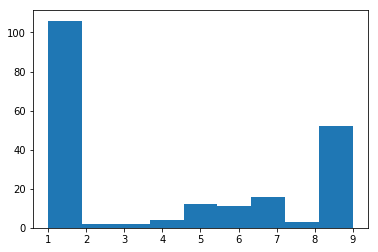

In [9]:
plt.hist(Y,bins=9)

In [ ]:
def num2onehot(num):
    out = np.zeros((1,9))
    out[0,num-1] = 1;
    return out

In [ ]:
num2onehot(6)

In [ ]:
def one_hot_coding(Y):
    Y_one_hot = np.zeros((Y.shape[0],9))
    for i in range (Y.shape[0]):
        Y_one_hot[i,:] = num2onehot(Y[i,0])
    return Y_one_hot

In [ ]:
test = one_hot_coding(Y)

In [ ]:
test.shape

In [10]:
def divide_classes(X,Y):
    X1=np.empty((1,100,100,3))
    X2=np.empty((1,100,100,3))
    X3=np.empty((1,100,100,3))
    X4=np.empty((1,100,100,3))
    X5=np.empty((1,100,100,3))
    X6=np.empty((1,100,100,3))
    X7=np.empty((1,100,100,3))
    X8=np.empty((1,100,100,3))

    for i in range (208):
        if ((Y[i,0]==1) & (X1.shape[0]<21)):
            X1 = np.concatenate((X1,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==2):
            X2 = np.concatenate((X2,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==3):
            X3 = np.concatenate((X3,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==4):
            X4 = np.concatenate((X4,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==5):
            X5 = np.concatenate((X5,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==6):
            X6 = np.concatenate((X6,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==7):
            X7 = np.concatenate((X7,X[i:i+1,:,:,:]), axis=0)
        if (Y[i,0]==8):
            X8 = np.concatenate((X8,X[i:i+1,:,:,:]), axis=0)
    return X1,X2,X3,X4,X5,X6,X7,X8

In [11]:
print(Y[1,0])
X1,X2,X3,X4,X5,X6,X7,X8 = divide_classes(X,Y)

9


In [12]:
X2.shape[0]

3

In [13]:
def delete_classes(X,Y):
    index_to_delete=[]
    count=0;
    for i in range (Y.shape[0]):
        if (Y[i,0]==9):
            index_to_delete.append(i)
        if (Y[i,0]==1):
            count +=1
            if (count>20):
                index_to_delete.append(i)
        
    X_new = np.delete(X,index_to_delete,0)
    Y_new = np.delete(Y,index_to_delete,0)
    return X_new, Y_new

In [14]:
X_new, Y_new = delete_classes(X,Y)

In [15]:
X_new.shape

(70, 100, 100, 3)

In [16]:
Y_new.shape

(70, 1)

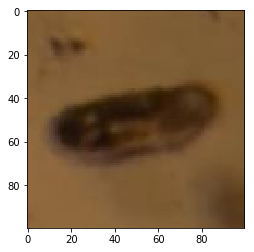

In [52]:
plt.imshow(X_new[69,:,:,:]/255)

In [22]:
Y_new[67,0]

2

In [39]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    #nW = int((h * sin) + (w * cos))
    #nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    #M[0, 2] += (nW / 2) - cX
    #M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (w,h))

In [48]:
X_1 = rotate_bound(X_new[67,:,:,:], 90)

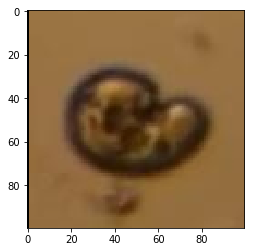

In [49]:
plt.imshow(X_1/255)

In [38]:
X_1.shape

(50, 50, 3)

In [77]:
X_rotated=[]
Y_rotated=[]
for i in range (10,370,60): 
    X_rotated.append(rotate_bound(X_new[66,:,:,:],10*i))
    Y_rotated.append(2)
    X_rotated.append(rotate_bound(X_new[67,:,:,:],10*i))
    Y_rotated.append(2)
    X_rotated.append(rotate_bound(X_new[68,:,:,:],10*i))
    Y_rotated.append(3)
    X_rotated.append(rotate_bound(X_new[69,:,:,:],10*i))
    Y_rotated.append(3)

In [78]:
len(X_rotated)
len(Y_rotated)

24

In [79]:
X_rotated_array=np.array(X_rotated)
Y_rotated_array=np.array(Y_rotated)

In [80]:
X_rotated_array.shape

(24, 100, 100, 3)

In [81]:
Y_rotated_array.shape

(24,)

In [83]:
Y_rotated_array=Y_rotated_array.reshape([Y_rotated_array.shape[0],1])

In [84]:
Y_rotated_array.shape

(24, 1)

In [85]:
X_new = np.concatenate((X_new, X_rotated_array), axis=0)

In [86]:
X_new.shape

(134, 100, 100, 3)

In [87]:
Y_new = np.concatenate((Y_new, Y_rotated_array), axis=0)

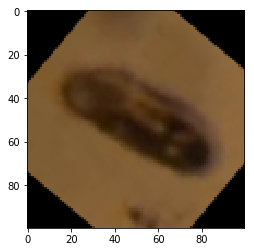

In [88]:
plt.imshow(X_new[-1,:,:,:]/255)

In [89]:
Y_new[-1,0]

3

(array([20., 34., 34.,  4., 12., 11., 16.,  3.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

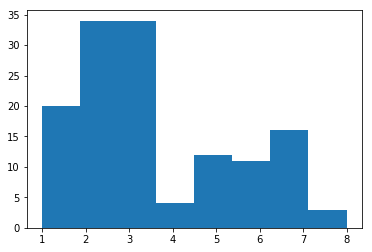

In [90]:
plt.hist(Y_new,bins=8)